  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 871.2 kB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.9 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 1.4 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 391.6 kB/s eta 0:00:00--:--
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)

 Input:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input: (4, 3)

 Actual Output:
[[1 1 0]]

 Shape of Output: (1, 3)


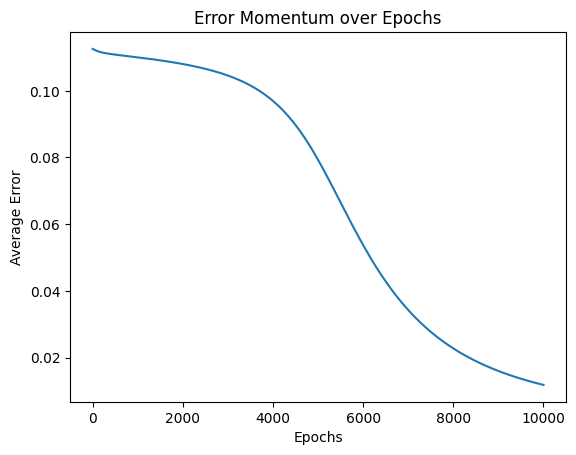

In [4]:
# Importing libraries
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Creating the input array
X = np.array([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

# Converting the input in matrix form
X = X.T
print('\n Input:')
print(X)

# Shape of input array
print('\n Shape of Input:', X.shape)

# Creating the output array
y = np.array([[1], [1], [0]])

# Output in matrix form
y = y.T
print('\n Actual Output:')
print(y)

# Shape of output array
print('\n Shape of Output:', y.shape)

# Defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Defining the hyperparameters of the model
lr = 0.01  # Learning rate
inputlayer_neurons = X.shape[0]  # Number of features in dataset
hiddenlayer_neurons = 3  # Number of hidden layers neurons
output_neurons = 1  # Number of neurons at output layer

epochs = 10000  # Number of epochs

# Initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

# Defining the momentum parameters
beta = 0.9
v_ho = 0
v_ih = 0

error_momentum = []
for i in range(epochs):
    # Forward Propagation

    # Hidden layer activations
    hidden_layer_input = np.dot(w_ih.T, X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)

    # Calculating the output
    output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
    output = sigmoid(output_layer_input)

    # Backward Propagation

    # Calculating error
    error = np.square(y - output) / 2
    error_wrt_output = -(y - output)
    output_wrt_Z2 = np.multiply(output, (1 - output))
    Z2_wrt_who = hiddenlayer_activations

    # Rate of change of error w.r.t weight between output and hidden layer
    error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)
    
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations, (1 - hiddenlayer_activations))
    Z1_wrt_wih = X

    # Rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih, (h1_wrt_Z1 * np.dot(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2))).T)

    # Weighted gradient
    v_ho = beta * v_ho + (1 - beta) * error_wrt_who
    w_ho = w_ho - lr * v_ho
    v_ih = beta * v_ih + (1 - beta) * error_wrt_wih
    w_ih = w_ih - lr * v_ih

    # Appending the error of each epoch
    error_momentum.append(np.average(error))

# Plotting outside the loop
plt.plot(np.arange(1, epochs + 1), np.array(error_momentum))
plt.title("Error Momentum over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.show()
